# Plasma in ExB 2D

Simulation of charged particle in  E and B fields. Some simple simulation to show behaviour of electrons and ions in HET - Hall Effect thruster

Important notes:
* Units are not conformed
* Code is not optimized eg. it based on Python list, not NumPy arrays etc
* Velocity is in plane X-Y, B is in Z direction
* Movment inegration is simple Euler method


larmor=  1.0 dt=  0.004  steps=  5000


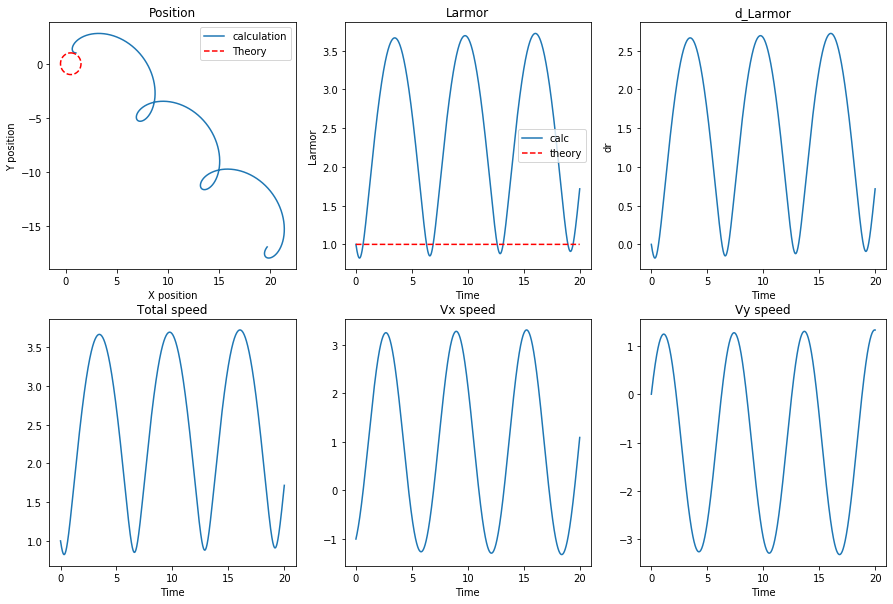

In [47]:
import matplotlib.pyplot as plt
import math
import numpy as np
#%matplotlib inline
#r=mv/qb
B=2
E=[1,1]

vx=[-1]
vy=[0]
q=1
m=2
maxx=5000
totaltime=20
dt=0.1

t=[0]
r=[0]
rl=m*(math.sqrt(vx[0]*vx[0]+vy[0]*vy[0]))/(q*B)
rll=[rl]
r=[rl]
dr=[0]
x=[rl]
y=[rl]

dt=totaltime/float(maxx)
print('larmor= ',rl,'dt= ',round(dt,4),' steps= ',maxx)

#/*grab magnetic field at current position*/
#B=EvalB(x);

#/*get new velocity at n+1*/
for i in range(1,maxx):
    #vx.append((vx[i-1]+i)*i)
    #print(i,vx)
    t.append(t[i-1]+dt)
    vx.append(vx[i-1] + q/m*B*vy[i-1]*dt+E[0]*dt)
    vy.append(vy[i-1] - q/m*B*vx[i-1]*dt+E[1]*dt)
    x.append(x[i-1]+vx[i]*dt)
    y.append(y[i-1]+vy[i]*dt)
    r.append(m*(math.sqrt(vx[i]*vx[i]+vy[i]*vy[i]))/(q*B))
    dr.append(r[i]-rl)
    rll.append(rl)
    
vtot = [math.sqrt(a**2+b**2) for a, b in zip(vx,vy)]

theta=np.linspace(0,np.pi*2,100)
xr=1/B+rl*np.sin(theta)
yr=rl*np.cos(theta)

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.plot(x,y,label="calculation")
plt.plot(xr,yr,'r--',label='Theory')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Position')
plt.legend()


plt.subplot(2,3,2)
plt.plot(t,r,label='calc')
plt.plot(t,rll,'r--',label='theory')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Larmor')
plt.title('Larmor')


plt.subplot(2,3,3)
plt.plot(t,dr)
plt.xlabel('Time')
plt.ylabel('dr')
plt.title('d_Larmor')

plt.subplot(2,3,4)
plt.plot(t,vtot)
plt.xlabel('Time')
plt.title('Total speed')

plt.subplot(2,3,5)
plt.plot(t,vx)
plt.xlabel('Time')
plt.title('Vx speed')

plt.subplot(2,3,6)
plt.plot(t,vy)
plt.xlabel('Time')
plt.title('Vy speed')

plt.show()
#print(t,'\n',vx,'\n',vy)


In [ ]:
rl=[]
rl[0]=[m*(math.sqrt(vx[0]*vx[0]+vy[0]*vy[0]))/(q*B)]

In [31]:
dxx=max(x)-min(x)
dyy=max(y)-min(y)
print('max X= ',max(x),' min X ',min(x))
print('max Y= ',max(y),' min y ',min(y))
print('dxx= ',dxx,' dyy= ',dyy)
#

max X=  1.0321529108699499  min X  -0.03269916859079777
max Y=  0.5324243397631706  min y  -0.5296439617695772
dxx=  1.0648520794607477  dyy=  1.0620683015327477


In [ ]:
print(math.sqrt(2))